<a href="https://colab.research.google.com/github/immanuel4082/mental-health-prediction-ML/blob/main/mentalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:

url = 'https://raw.githubusercontent.com/immanuel4082/mental-health-prediction-ML/main/Student%20Mental%20health.csv'
df = pd.read_csv(url,index_col=0)
df = pd.read_csv(url)
df


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [12]:
df.rename(columns = {'Choose your gender':'Gender',
                     'What is your course?':'Course',
                     'Your current year of Study': 'Year',
                     'What is your CGPA?': 'CGPA',
                     'Marital status': 'Married',
                     'Do you have Depression?': 'Depression',
                     'Do you have Anxiety?': 'Anxiety',
                     'Do you have Panic attack?': 'Panic Attack',
                     'Did you seek any specialist for a treatment?': 'Seeking Treatment'},inplace = True)

# Dropping the timestamp table as I don't see it as important
df = df.drop(columns = "Timestamp")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             101 non-null    object 
 1   Age                100 non-null    float64
 2   Course             101 non-null    object 
 3   Year               101 non-null    object 
 4   CGPA               101 non-null    object 
 5   Married            101 non-null    object 
 6   Depression         101 non-null    object 
 7   Anxiety            101 non-null    object 
 8   Panic Attack       101 non-null    object 
 9   Seeking Treatment  101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


In [13]:
df[df.isnull().any(axis=1)]

,Gender,Age,Course,Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seeking Treatment
43,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [14]:
df = df.dropna()
df.isnull().sum()

Gender               0
Age                  0
Course               0
Year                 0
CGPA                 0
Married              0
Depression           0
Anxiety              0
Panic Attack         0
Seeking Treatment    0
dtype: int64

In [15]:
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [16]:
# Changing all entries into a lower string
df['Course'] = df['Course'].str.lower()

# Removing unnecessary spaces from the Course and CGPA column
df['Course'] = df['Course'].str.strip()
df['CGPA'] = df['CGPA'].str.strip()

df['Course'].unique()

array(['engineering', 'islamic education', 'bit', 'laws', 'mathemathics',
       'pendidikan islam', 'bcs', 'human resources', 'irkhs',
       'psychology', 'kenms', 'accounting', 'enm', 'marine science',
       'koe', 'banking studies', 'business administration', 'law',
       'kirkhs', 'usuluddin', 'taasl', 'engine', 'ala',
       'biomedical science', 'benl', 'it', 'cts', 'engin', 'econs',
       'mhsc', 'malcom', 'kop', 'human sciences', 'biotechnology',
       'communication', 'diploma nursing', 'radiography', 'fiqh fatwa',
       'diploma tesl', 'fiqh', 'nursing'], dtype=object)

In [17]:
df['Course'].replace({'pendidikan islam': 'education',
                      'laws': 'law',
                      'engine': 'engineering',
                      'engin': 'engineering',
                      'diploma nursing': 'nursing',
                      'bit': 'it',
                      'kirkhs': 'irkhs',
                      'usuluddin': 'irkhs',
                      'fiqh fatwa': 'irkhs',
                      'fiqh': 'irkhs',
                      'human resources': 'human sciences',
                      'econs': 'economics',
                      'kenms': 'economics',
                      'enm': 'economics',
                      'kop': 'pharmacy',
                      'koe': 'education',
                      'benl': 'education',
                      'islamic education': 'education',
                      'mathemathics': 'mathematics',
                      'diploma tesl': 'education',
                      'mhsc': 'human sciences',
                      'taasl': 'education',
                      'ala': 'human sciences',
                      'bcs': 'computer science',
                      'malcom': 'communication'}, inplace=True)

df['Course'].unique()

array(['engineering', 'education', 'it', 'law', 'mathematics',
       'computer science', 'human sciences', 'irkhs', 'psychology',
       'economics', 'accounting', 'marine science', 'banking studies',
       'business administration', 'biomedical science', 'cts',
       'communication', 'pharmacy', 'biotechnology', 'nursing',
       'radiography'], dtype=object)

In [18]:
df['Course'] = df['Course'].str.title()
df['Course'].replace({'It': 'IT',
                      'Irkhs': 'IRKHS',
                      'Cts': 'CTS'
                          }, inplace=True)
df['Course'].unique()

array(['Engineering', 'Education', 'IT', 'Law', 'Mathematics',
       'Computer Science', 'Human Sciences', 'IRKHS', 'Psychology',
       'Economics', 'Accounting', 'Marine Science', 'Banking Studies',
       'Business Administration', 'Biomedical Science', 'CTS',
       'Communication', 'Pharmacy', 'Biotechnology', 'Nursing',
       'Radiography'], dtype=object)

In [19]:
df['CGPA'].replace({'0 - 1.99': 1,
                    '2.00 - 2.49': 2,
                    '2.50 - 2.99': 3,
                    '3.00 - 3.49': 4,
                    '3.50 - 4.00': 5}, inplace=True)

# I also capitalized the Year column to group all entries that had different spellings.
df ['Year'] = df['Year'].str.title()

In [20]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             100 non-null    object 
 1   Age                100 non-null    float64
 2   Course             100 non-null    object 
 3   Year               100 non-null    object 
 4   CGPA               100 non-null    int64  
 5   Married            100 non-null    object 
 6   Depression         100 non-null    object 
 7   Anxiety            100 non-null    object 
 8   Panic Attack       100 non-null    object 
 9   Seeking Treatment  100 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.6+ KB


,Gender,Age,Course,Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seeking Treatment
0,Female,18.0,Engineering,Year 1,4,No,Yes,No,Yes,No
1,Male,21.0,Education,Year 2,4,No,No,Yes,No,No
2,Male,19.0,IT,Year 1,4,No,Yes,Yes,Yes,No
3,Female,22.0,Law,Year 3,4,Yes,Yes,No,No,No
4,Male,23.0,Mathematics,Year 4,4,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,Computer Science,Year 1,5,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,4,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,5,Yes,Yes,No,Yes,No
99,Female,23.0,Education,Year 4,5,No,No,No,No,No


In [21]:
df.loc[(df["Depression"]=="Yes") | (df["Anxiety"]=="Yes") | (df["Panic Attack"]=="Yes"),'Mental Health Issues']= 'Yes'
df.loc[(df["Depression"]=="No") & (df["Anxiety"]=="No") & (df["Panic Attack"]=="No"),'Mental Health Issues']= 'No'


# Creating a dataframe with students who have mental health issues or not
mental_health_yes = df[df["Mental Health Issues"] == 'Yes']
mental_health_no = df[df["Mental Health Issues"] == 'No']

# Showing the count of Students grouped via Mental Health Issues
df.groupby(['Mental Health Issues']).count()

,Gender,Age,Course,Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seeking Treatment
Mental Health Issues,,,,,,,,,,
No,36,36,36,36,36,36,36,36,36,36
Yes,64,64,64,64,64,64,64,64,64,64


<function matplotlib.pyplot.show(*args, **kw)>

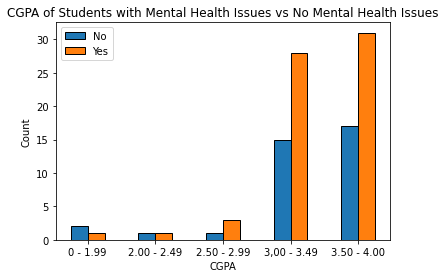

In [23]:
# Creating a series of the students CGPA for both dataframes of students with MH Issues and no MH Issues
mental_health_no_cgpa = mental_health_no.groupby("CGPA")["Mental Health Issues"].count()
mental_health_yes_cgpa = mental_health_yes.groupby("CGPA")["Mental Health Issues"].count()

#Plotting a comparison bar chart 
n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, mental_health_no_cgpa,
        width = width, edgecolor = 'black',
        label='No')
plt.bar(r + width, mental_health_yes_cgpa,
        width = width, edgecolor = 'black',
        label='Yes')

plt.xlabel("CGPA")
plt.ylabel('Count')
plt.title("CGPA of Students with Mental Health Issues vs No Mental Health Issues")
  

plt.xticks(r + width/2,['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3,00 - 3.49', '3.50 - 4.00'])
plt.legend()

plt.show

In [24]:
# Creating a series where the count of student's MH Issues is grouped by course
mental_health_no_course = mental_health_no.groupby("Course")["Mental Health Issues"].count()
mental_health_yes_course = mental_health_yes.groupby("Course")["Mental Health Issues"].count()

# Sorting from highest to lowest 
mental_health_no_course = mental_health_no_course.sort_values(ascending = False)
mental_health_yes_course = mental_health_yes_course.sort_values(ascending = False)

# Creating a new dataframe for this plot
new_df = pd.concat([mental_health_yes_course, mental_health_no_course], axis=1)

# Renaming the column names
new_df.columns.values[0] = "Has Mental Health Issues"
new_df.columns.values[1] = "No Mental Health Issues"

# Changing the NULL values into 0 and then creating a new column named Total.
new_df.fillna(0, inplace = True)
new_df['Total'] = new_df['Has Mental Health Issues'] + new_df['No Mental Health Issues']

# Sorting
new_df = new_df.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=False)

new_df = new_df.reset_index(level=0)

new_df.head()

,Course,Has Mental Health Issues,No Mental Health Issues,Total
0,Engineering,12.0,8.0,20.0
1,Computer Science,11.0,7.0,18.0
2,Education,11.0,5.0,16.0
3,IT,10.0,0.0,10.0
4,IRKHS,3.0,3.0,6.0


Text(0.5, 1.0, 'Count of Students with MH Issues')

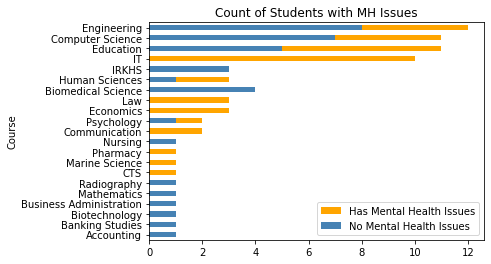

In [25]:
# Sorting Data for this plot
new_df = new_df.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=True)

# Plotting via stacked horizontal bars
ax = new_df.plot(x="Course", y="Has Mental Health Issues", kind="barh", color = 'orange')

new_df.plot(x="Course", y="No Mental Health Issues", kind="barh", ax=ax, color = 'steelblue')
plt.title('Count of Students with MH Issues')